# LEVEL 3

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import seaborn as sns
import matplotlib.pyplot as plt

READ IN THE CLEANED DATASET

In [2]:
df=pd.read_csv('cleaned_data.csv')
display(df)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, R۱ht۱m Cadd...",Karaky,"Karaky, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin stnda Caddesi, No ...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 56...",Kurueme,"Kurueme, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,"Kurueme Mahallesi, Muallim Naci Caddesi, No 64...",Kurueme,"Kurueme, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# TASK 1:RESTAURANT REVIEWS

QUESTIONS: 
1. Analyze the text reviews to identify the most
common positive and negative keywords.
2. Calculate the average length of reviews and
explore if there is a relationship between
review length and rating

1. ANALYSIS OF TEXT REVIEWS TO IDENTIFY MOST COMMON POSITIVE AND NEGATIVE KEYWORDS

In [3]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [4]:
# Create a mapping for review text 
sentiment_map= {'Excellent':'Positive',
         'Very Good' : 'Positive',
         'Good' : 'Positive',
         'Average' : 'Negative',
         'poor' : 'Negative',
         'Not rated' : 'Neutral'
}

# Apply the mapping 
df['Sentiment']= df['Rating text'].map(sentiment_map)
print(sentiment_map)



{'Excellent': 'Positive', 'Very Good': 'Positive', 'Good': 'Positive', 'Average': 'Negative', 'poor': 'Negative', 'Not rated': 'Neutral'}


In [5]:
# Create a mapping for review text
sentiment_map = {
    'Excellent': 'Positive',
    'Very Good': 'Positive',
    'Good': 'Positive',
    'Average': 'Negative',
    'Poor': 'Negative',
    'Not rated': 'Neutral'
}

# Apply the mapping to create a new 'Sentiment' column
df['Sentiment'] = df['Rating text'].map(sentiment_map)

# Now filter reviews based on the sentiment category
positive_reviews = df[df['Sentiment'] == 'Positive']['Rating text'].dropna()
negative_reviews = df[df['Sentiment'] == 'Negative']['Rating text'].dropna()

# Tokenization Fix for Multi-word Phrases
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.replace("very good", "very_good")  # Preserve "Very Good" as one word
    words = re.findall(r'\b\w+\b', text)  # Extract words
    return words

def get_common_words(reviews, num_words=10):
    processed_reviews = [preprocess_text(review) for review in reviews]  # Apply tokenization
    words = [word for sublist in processed_reviews for word in sublist]  # Flatten list
    return Counter(words).most_common(num_words)  # Get top words

# Get top 10 words for each category
top_positive_words = get_common_words(positive_reviews)
top_negative_words = get_common_words(negative_reviews)

print("Most Common Positive Words:", top_positive_words)
print("Most Common Negative Words:", top_negative_words)

Most Common Positive Words: [('good', 2100), ('very_good', 1079), ('excellent', 301)]
Most Common Negative Words: [('average', 3737), ('poor', 186)]


2. AVERAGE LENGHT OF REVIEW 

In [6]:
df['Review Length'] = df['Rating text'].dropna().apply(lambda x: len(x.split()))
average_review_length = df['Review Length'].mean()

print(f"Average Review Length: {average_review_length:.2f} words")

Average Review Length: 1.34 words


# TASK 2 : VOTE ANALYSIS

QUESTIONS:
1. Identify the restaurants with the highest and lowest number of votes.
2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

1. RESTAURANTS WITH HIGHEST NUMBER OF VOTES

In [7]:
# Restaurant with highest number of votes
highest_votes = df.loc[df['Votes'].idxmax()] 
print('Restaurants with highest votes:')
print(highest_votes)

Restaurants with highest votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                      No
Has On

RESTAURANTS WITH LOWEST NUMBER OF VOTES

In [8]:
# Minimum votes value
minimum_votes_value = df['Votes'].min()
print('The minimum votes value is ')
print(minimum_votes_value)

The minimum votes value is 
0


In [9]:
# Restaurants with lowest number of votes
Restaurants_with_lowest_votes = df[df['Votes'] == minimum_votes_value]
display(Restaurants_with_lowest_votes)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Sentiment,Review Length
69,6710645,Cantinho da Gula,30,So Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, So Pau...",Itaim Bibi,"Itaim Bibi, So Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,2,0.0,White,Not rated,0,Neutral,2
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,1,0.0,White,Not rated,0,Neutral,2
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,1,0.0,White,Not rated,0,Neutral,2
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,No,No,No,1,0.0,White,Not rated,0,Neutral,2
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,No,No,No,1,0.0,White,Not rated,0,Neutral,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,18486858,6 Packs Momos,1,Noida,"Spice World Mall, Sector 25, Noida","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.340602,28.586000,Chinese,...,No,No,No,1,0.0,White,Not rated,0,Neutral,2
9098,18431152,Cafe' Wow,1,Noida,"Food Court, 3rd Floor, The Great India Palace ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325600,28.567514,Fast Food,...,No,No,No,1,0.0,White,Not rated,0,Neutral,2
9099,18439721,Chef's Basket Pop Up Caf,1,Noida,"Inside Big Bazaar, The Great India Place, Sect...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",0.000000,0.000000,"Italian, Chinese",...,No,No,No,1,0.0,White,Not rated,0,Neutral,2
9103,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,No,No,No,3,0.0,White,Not rated,0,Neutral,2


2. CORRELATION BETWEEN NUMBER OF VOTES AND RATING OF RESTAURANTS

In [10]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between votes and rating : {correlation}")

Correlation between votes and rating : 0.31369058419541146


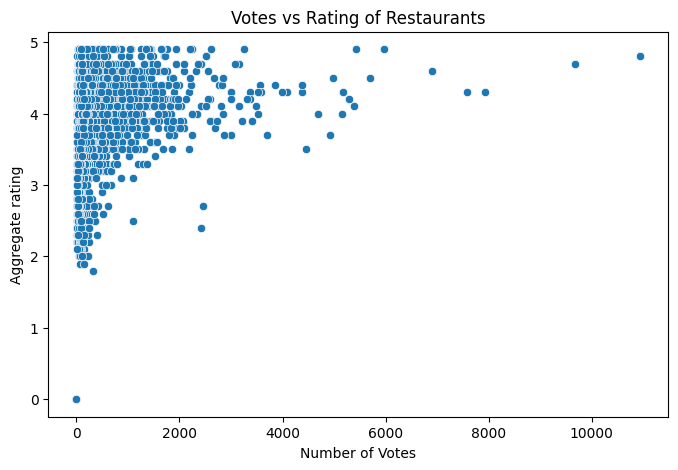

In [11]:
# Scatter plot of votes vs. rating to visualize the correlation
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'])
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate rating")
plt.title("Votes vs Rating of Restaurants")
plt.show()

r = 0.3 means there is a weak positive correlation between votes and rating

# TASK 3 : PRICE RANGE VS. ONLINE DELIVERY AND TABLE BOOKING

QUESTION:
1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
2. Determine if higher-priced restaurants are more likely to offer these services.

1. RELATIONSHIP BETWEEN PRICE RANGE AND ONLINE DELIVERY

In [12]:
# Check how price range affects online delivery 
price_vs_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

# Round to 2 decimal places
price_vs_delivery = price_vs_delivery.round(2)

# Print
print("Online Delivery Distribution by\n", price_vs_delivery)



Online Delivery Distribution by
 Has Online delivery     No    Yes
Price range                      
1                    84.23  15.77
2                    58.69  41.31
3                    70.81  29.19
4                    90.96   9.04


RELATIONSHIP BETWEEN PRICE RANGE AND TABLE BOOKINGS

In [13]:
# Check how price range affects table booking
price_vs_booking = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100

# Round to 2 decimal places
price_vs_booking = price_vs_booking. round(2)

# Print
print("\nTable Booking Distribution by \n", price_vs_booking)


Table Booking Distribution by 
 Has Table booking     No    Yes
Price range                    
1                  99.98   0.02
2                  92.32   7.68
3                  54.26  45.74
4                  53.24  46.76


2. DETERMINE IF HIGHER PRICED RESTAURANTS ARE MORE LIKELY TO OFFER THESE SERVICES

Higher-priced restaurants (ranges 3 and 4) offer table booking at much higher rates (45-47%).
Table booking is more common in expensive restaurants, unlike online delivery.

Higher-priced restaurants (range 4) are less likely to offer online delivery (only 9.04% provide this service).

Cheaper restaurants (range 1) almost never provide table booking (0.02%).

Restaurants in price range 2 (moderate pricing) have the highest percentage (41.31%) offering online delivery.




There is a clear relationship between price range and service availability, meaning higher-priced restaurants prioritize table booking while lower-priced ones focus on online delivery